In [6]:
import os
from dotenv import load_dotenv

# .env dosyasından KAGGLE bilgilerini yükle
load_dotenv()

# Ortam değişkenlerini ayarla (Kaggle CLI için gerekli)
os.environ['KAGGLE_USERNAME'] = os.getenv("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = os.getenv("KAGGLE_KEY")

In [8]:
import pandas as pd

# Dosya yolu
DATA_PATH = "./data/Books_rating.csv"  # Kendi yoluna göre ayarlayabilirsin

# Veriyi oku
df = pd.read_csv(DATA_PATH)

# İlk birkaç satırı göster
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [15]:
# Dosyayı yükle (şu anlık tüm veriyi değil, hızlı inceleme için ilk 100.000 satır)
df_analysis = pd.read_csv("./data/Books_rating.csv", nrows=100000)


# Genel bilgi
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  100000 non-null  object 
 1   Title               99999 non-null   object 
 2   Price               12982 non-null   float64
 3   User_id             80784 non-null   object 
 4   profileName         80780 non-null   object 
 5   review/helpfulness  100000 non-null  object 
 6   review/score        100000 non-null  float64
 7   review/time         100000 non-null  int64  
 8   review/summary      99982 non-null   object 
 9   review/text         100000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [11]:
# Yorumların istatistiklerine bakalım
df_analysis["review/text"].describe()

count                                                100000
unique                                                93565
top       This book is a great example of rational think...
freq                                                     14
Name: review/text, dtype: object

In [16]:
# Eksik (NaN) değer sayısı
missing_count = df["review/text"].isna().sum()

# Boş string veya sadece boşluk olanları bul
empty_strings = (df["review/text"].fillna("").str.strip() == "").sum()

# Çok kısa yorumlar (örneğin 3 kelime ve altı)
short_reviews = df["review/text"].fillna("").apply(lambda x: len(str(x).split()) <= 3).sum()

print(f"NaN sayısı: {missing_count}")
print(f"Boş string sayısı: {empty_strings}")
print(f"Çok kısa yorum sayısı (≤ 3 kelime): {short_reviews}")

NaN sayısı: 8
Boş string sayısı: 8
Çok kısa yorum sayısı (≤ 3 kelime): 864


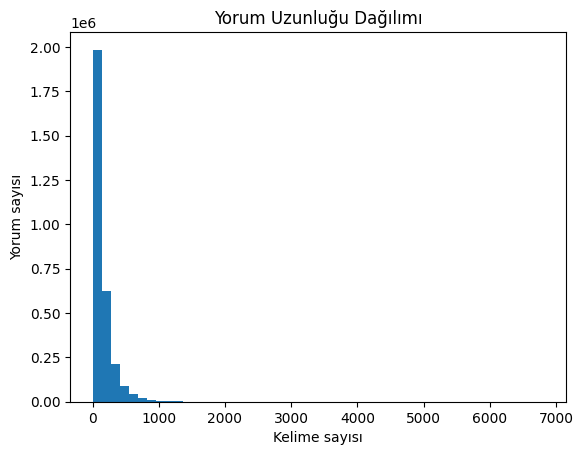

In [17]:
import matplotlib.pyplot as plt

review_lengths = df["review/text"].dropna().apply(lambda x: len(str(x).split()))

plt.hist(review_lengths, bins=50)
plt.xlabel("Kelime sayısı")
plt.ylabel("Yorum sayısı")
plt.title("Yorum Uzunluğu Dağılımı")
plt.show()

                                         review/text  word_count  is_short
0  This is only for Julie Strain fans. It's a col...          86     False
1  I don't care much for Dr. Seuss but after read...         252     False
2  If people become the books they read and if "t...         310     False
3  Philip Nel - Dr. Seuss: American IconThis is b...         273     False
4  "Dr. Seuss: American Icon" by Philip Nel is a ...         298     False
5  Theodor Seuss Giesel was best known as 'Dr. Se...          87     False
6  When I recieved this book as a gift for Christ...         210     False
7  Trams (or any public transport) are not usuall...          63     False
8  As far as I am aware, this is the first book-l...         243     False
9  I just finished the book, &quot;Wonderful Wors...         137     False
